In [1]:
!pwd

/home/wh2405/RaDialog


In [2]:
!python --version

Python 3.7.16


In [3]:
import torch 
print(torch.__version__)

1.13.0+cu117


### Environment set up & Installation

In [12]:
#https://sites.google.com/nyu.edu/nyu-hpc/hpc-systems/greene/software/singularity-with-miniconda
#https://sites.google.com/nyu.edu/nyu-hpc/hpc-systems/greene/software/open-ondemand-ood-with-condasingularity?authuser=0
#Use environment: my_env 

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import torch

In [14]:
from skimage import io

https://www.youtube.com/watch?v=PlVCShv8jcU

## Data preperation (TODO)

### MIMIC - image and report

### UI - image and report


Referenece: https://github.com/rohansoni634/Indiana-University-Chest-X-Rays-Automated-Report-Generation
Data preparation : https://rohansoni-jssaten2019.medium.com/indiana-university-chest-x-rays-automated-report-generation-38f928e6bfc2

#### Extracting data from XML files

In [64]:
import tqdm 

for file in tqdm(os.listdir("ecgen-radiology/")):
    if file.endswith(".xml"):
        k = "ecgen-radiology/"
        path = k + file
        mytree = ET.parse(path)# parsing xml report
        comparision = mytree.find(".//AbstractText[@Label='COMPARISON']").text # extracting comaparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text #extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text # extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text  # extracting impression text

        mytree = ET.parse(path)
        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id']+".png"
            filename = 'NLMCXR_png/' + image_id
            image = cv2.imread(filename) # reading image
             
            height, width, channels = image.shape
            caption = '' if x.find('caption').text is None else x.find('caption').text
     
            df = df.append(pd.Series([image_id, caption, comparision, indication, findings, impression,height,width],
                                                         index = columns), ignore_index = True)

NameError: name 'tqdm' is not defined

## Image Analysis

### MIMIC-CXR-JPG

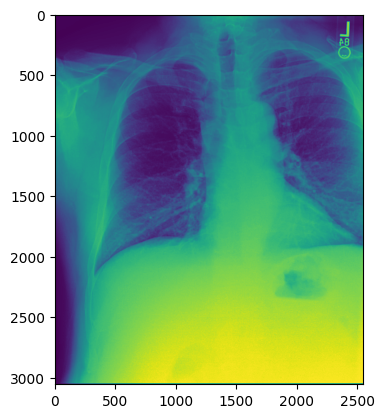

In [15]:
# Read Images
img_mimic= mpimg.imread('/vast/wh2405/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10999737/s52341872/5aea5877-40b40fee-5bccd163-ca1bf0ce-a95c213d.jpg')

# Output Images
plt.imshow(img_mimic)

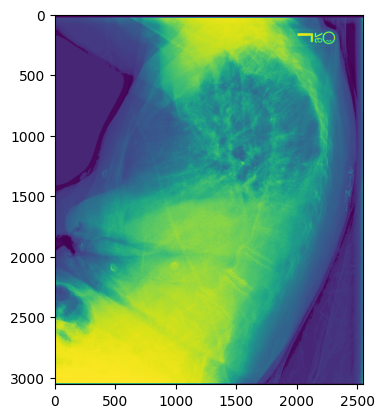

In [62]:
#understand which kind of view a patient has -1 
#lateral 
img_mimic= mpimg.imread('/vast/wh2405/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10003502/s52139270/489faba7-a9dc5f1d-fd7241d6-9638d855-eaa952b1.jpg')
plt.imshow(img_mimic)

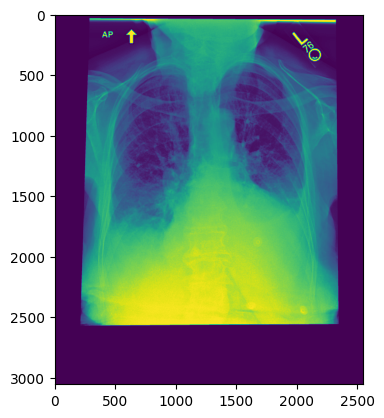

In [63]:
#understand which kind of view a patient has -2
#AP
img_mimic= mpimg.imread('/vast/wh2405/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10003502/s52139270/550e6f3b-f008c1d0-8d2dee2a-649b30f4-101a98cc.jpg')
plt.imshow(img_mimic)

In [16]:
img_mimic.shape

(3056, 2544)

### IU Dataset

In [17]:
from PIL import Image

def load_and_convert_image(image_path):
    """Loads an image using PIL and converts it to grayscale.

    Args:
        image_path (str): The path to the image file.

    Returns:
        PIL.Image: The loaded and grayscale image.

    Raises:
        FileNotFoundError: If the image file is not found.
    """

    try:
        # Load the image
        image = Image.open(image_path)

        # Check if the image already has one channel (grayscale)
        if image.mode == 'L':
            print("already grayscale")
            return image  # Already grayscale
        else:
            # Convert to grayscale if needed
            grayscale_image = image.convert('L')
            return grayscale_image

    except FileNotFoundError as e:
        print(f"Error: Image file not found: {image_path}")
        raise e



In [18]:
image_path = '/vast/wh2405/CXR735_IM-2294-1001.png'
grayscale_image = load_and_convert_image(image_path)

# # You can now use the grayscale_image for further processing
# # For example, display it:
# grayscale_image.show()

In [19]:
grayscale_image.size

(512, 624)

## Import Model (biovil-t (image encoder part), chexpert and vicuna)

https://github.com/zoe70416/RaDialog

https://notebooks.gesis.org/binder/jupyter/user/microsoft-hi-ml-jpz3nptq/doc/tree/hi-ml-multimodal/notebooks

https://github.com/microsoft/hi-ml/blob/main/hi-ml-multimodal/src/health_multimodal/image/model/model.py

### Installation

In [20]:
from typing import List
from typing import Tuple

import tempfile
from pathlib import Path

import torch
from IPython.display import display
from IPython.display import Markdown

In [21]:
import torch
print(torch.__version__)

1.13.0+cu117


In [22]:
from biovil_t.pretrained import get_biovil_image_encoder
from biovil_t.pretrained import get_biovil_t_image_encoder
from model.lavis.data.ReportDataset import create_chest_xray_transform_for_inference

In [23]:
import dataclasses
import json
import time
from enum import auto, Enum
from typing import List, Any


import gradio as gr
from PIL import Image
# from peft import PeftModelForCausalLM
from skimage import io
from torch import nn
from transformers import LlamaTokenizer
from torchvision.transforms import Compose, Resize, ToTensor, CenterCrop, transforms


In [24]:
from peft import PeftModelForCausalLM


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /ext3/py3.7/lib/python3.7/site-packages/bitsandbytes/libbitsandbytes_cuda118_nocublaslt.so


/ext3/py3.7/lib/python3.7/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/nvidia/lib64')}
  warn(msg)
/ext3/py3.7/lib/python3.7/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/ext3/py3.7/lib/python3.7/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/var/www/ood/apps/sys/dashboard')}
  warn(msg)
/ext3/py3.7/lib/python3.7/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/share/zsh/5.5.1/functions

CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /ext3/py3.7/lib/python3.7/site-packages/bitsandbytes/libbitsandbytes_cuda118_nocublaslt.so...


In [25]:
from model.lavis import tasks
from model.lavis.common.config import Config
from model.lavis.data.ReportDataset import create_chest_xray_transform_for_inference, ExpandChannels
from model.lavis.models.blip2_models.modeling_llama_imgemb import LlamaForCausalLM

In [26]:
import argparse
import os
import random
import numpy as np
import torch
from torch.backends import cudnn

from findings_classifier.chexpert_train import LitIGClassifier
from local_config import JAVA_HOME, JAVA_PATH

### Image Encoder

In [27]:
# image_path = '/vast/wh2405/CXR735_IM-2294-1001.png' #iu data
image_path = '/vast/wh2405/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10003502/s50084553/70d7e600-373c1311-929f5ff9-23ee3621-ff551ff9.jpg' #mimic-validation
biovil_encoder = get_biovil_t_image_encoder()

109746176it [00:00, 213344270.70it/s]                              


In [28]:
from PIL import Image

def load_and_convert_image(image_path):
    """Loads an image using PIL and converts it to grayscale.

    Args:
        image_path (str): The path to the image file.

    Returns:
        PIL.Image: The loaded and grayscale image.

    Raises:
        FileNotFoundError: If the image file is not found.
    """

    try:
        # Load the image
        image = Image.open(image_path)

        # Check if the image already has one channel (grayscale)
        if image.mode == 'L':
            print("already grayscale")
            return image  # Already grayscale
        else:
            # Convert to grayscale if needed
            grayscale_image = image.convert('L')
            return grayscale_image

    except FileNotFoundError as e:
        print(f"Error: Image file not found: {image_path}")
        raise e



In [29]:
#convert image into tensor
#TODO: check if the image is cropped correclty or not 
vis_transforms = create_chest_xray_transform_for_inference(512, center_crop_size=448)

image_path = '/vast/wh2405/CXR735_IM-2294-1001.png'
grayscale_image = load_and_convert_image(image_path)
# Convert the grayscale image to a tensor
image_tensor = vis_transforms(grayscale_image)
# Add a batch dimension (unsqueeze)
image_tensor = image_tensor.unsqueeze(0)  # Becomes (1, 3, 448, 448)
img_emb = biovil_encoder(image_tensor).projected_patch_embeddings

In [30]:
img_emb.shape

torch.Size([1, 128, 14, 14])

### Chexpert

In [31]:
from findings_classifier.chexpert_train import LitIGClassifier
from torchvision.transforms import Compose, Resize, ToTensor, CenterCrop, transforms
from model.lavis.data.ReportDataset import create_chest_xray_transform_for_inference, ExpandChannels

In [32]:
from skimage import io
from PIL import Image

In [33]:
def init_chexpert_predictor():
    ckpt_path = f"findings_classifier/checkpoints/chexpert_train/ChexpertClassifier-epoch=06-val_f1=0.36.ckpt"
    chexpert_cols = ["No Finding", "Enlarged Cardiomediastinum",
                          "Cardiomegaly", "Lung Opacity",
                          "Lung Lesion", "Edema",
                          "Consolidation", "Pneumonia",
                          "Atelectasis", "Pneumothorax",
                          "Pleural Effusion", "Pleural Other",
                          "Fracture", "Support Devices"]
    model = LitIGClassifier.load_from_checkpoint(ckpt_path, num_classes=14, class_names=chexpert_cols, strict=False)
    model.eval()
    model.cuda() # Uncomment if you have a GPU
    model.half()
    cp_transforms = Compose([Resize(512), CenterCrop(488), ToTensor(), ExpandChannels()])

    return model, np.asarray(model.class_names), cp_transforms


def remap_to_uint8(array: np.ndarray, percentiles=None) -> np.ndarray:
    """Remap values in input so the output range is :math:`[0, 255]`.

    Percentiles can be used to specify the range of values to remap.
    This is useful to discard outliers in the input data.

    :param array: Input array.
    :param percentiles: Percentiles of the input values that will be mapped to ``0`` and ``255``.
        Passing ``None`` is equivalent to using percentiles ``(0, 100)`` (but faster).
    :returns: Array with ``0`` and ``255`` as minimum and maximum values.
    """
    array = array.astype(float)
    if percentiles is not None:
        len_percentiles = len(percentiles)
        if len_percentiles != 2:
            message = (
                'The value for percentiles should be a sequence of length 2,'
                f' but has length {len_percentiles}'
            )
            raise ValueError(message)
        a, b = percentiles
        if a >= b:
            raise ValueError(f'Percentiles must be in ascending order, but a sequence "{percentiles}" was passed')
        if a < 0 or b > 100:
            raise ValueError(f'Percentiles must be in the range [0, 100], but a sequence "{percentiles}" was passed')
        cutoff: np.ndarray = np.percentile(array, percentiles)
        array = np.clip(array, *cutoff)
    array -= array.min()
    array /= array.max()
    array *= 255
    return array.astype(np.uint8)


def load_image(path) -> Image.Image:
    """Load an image from disk.

    The image values are remapped to :math:`[0, 255]` and cast to 8-bit unsigned integers.

    :param path: Path to image.
    :returns: Image as ``Pillow`` ``Image``.
    """
    # Although ITK supports JPEG and PNG, we use Pillow for consistency with older trained models
    image = io.imread(path)

    image = remap_to_uint8(image)
    return Image.fromarray(image).convert("L")


In [34]:
cp_model, cp_class_names, cp_transforms = init_chexpert_predictor()

Using downloaded and verified file: /state/partition1/job-45658153/biovil_t_image_model_proj_size_128.pt


/ext3/py3.7/lib/python3.7/site-packages/pytorch_lightning/core/saving.py:218: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['criterion.pos_weight']
  f"Found keys that are not in the model state dict but in the checkpoint: {keys.unexpected_keys}"


In [35]:
# image_path = '/vast/wh2405/CXR735_IM-2294-1001.png' #iu data
image_path = '/vast/wh2405/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10003502/s50084553/70d7e600-373c1311-929f5ff9-23ee3621-ff551ff9.jpg' #mimic-validation
vis_transforms = create_chest_xray_transform_for_inference(512, center_crop_size=448)
image = load_image(image_path)
# image = load_image(input_text[-1])
cp_image = cp_transforms(image)
image = vis_transforms(image)


In [36]:
logits = cp_model(cp_image[None].half().cuda())
preds_probs = torch.sigmoid(logits)
preds = preds_probs > 0.5
pred = preds[0].cpu().numpy()
findings = cp_class_names[pred].tolist()
findings = ', '.join(findings).lower().strip()

In [37]:
pred

array([False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False])

In [38]:
cp_class_names

array(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
       'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture', 'Support Devices'], dtype='<U26')

In [39]:
findings

'atelectasis, pneumothorax, pleural effusion'

### LLM & BLIP

#### Init blip

In [40]:
# !free -m

In [41]:
from argparse import Namespace
# path = 'pretraining/configs/blip2_pretrain_stage1_emb.yaml'
args = Namespace(cfg_path='pretraining/configs/blip2_pretrain_stage1_emb.yaml', local_rank=0, options=None)

In [42]:
def init_blip(cfg):
    task = tasks.setup_task(cfg)
    model = task.build_model(cfg)
    model = model.to(torch.device('cpu'))
    return model

In [43]:
def init_vicuna():
    use_embs = True

    # vicuna_tokenizer = LlamaTokenizer.from_pretrained("lmsys/vicuna-7b-v1.3", use_fast=False, truncation_side="left", padding_side="left")
    model_name = "/scratch/wh2405/vicuna-7b-v1.3"  # Or path to a local model directory
    vicuna_tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
    lang_model = LlamaForCausalLM.from_pretrained("lmsys/vicuna-7b-v1.3", torch_dtype=torch.float16, device_map='auto')
    vicuna_tokenizer.pad_token = vicuna_tokenizer.unk_token

    if use_embs:
        lang_model.base_model.img_proj_layer = nn.Linear(768, lang_model.base_model.config.hidden_size).to(lang_model.base_model.device)
        vicuna_tokenizer.add_special_tokens({"additional_special_tokens": ["<IMG>"]})

    lang_model = PeftModelForCausalLM.from_pretrained(lang_model,
                                                      f"checkpoints/vicuna-7b-img-instruct/checkpoint-4800",
                                                      torch_dtype=torch.float16, use_ram_optimized_load=False).half()
    # lang_model = PeftModelForCausalLM.from_pretrained(lang_model, f"checkpoints/vicuna-7b-img-report/checkpoint-11200", torch_dtype=torch.float16, use_ram_optimized_load=False).half()
    return lang_model, vicuna_tokenizer

In [44]:
cfg = Config(args)
blip_model = init_blip(cfg)

Using downloaded and verified file: /state/partition1/job-45658153/biovil_t_image_model_proj_size_128.pt


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertLMHeadModel: ['bert.embeddings.token_type_embeddings.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.10.crossattention.self.key.weight', 'bert.encoder.layer.4.crossattention.self.query.weight', 'bert.encoder.layer.4.intermediate_query.dense.weight', 'bert.encoder.layer.4.

In [45]:
gen_report = True
if gen_report:
    input_text = (f"Image information: <IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG>. Predicted Findings: {findings}. You are to act as a radiologist and write the finding section of a chest x-ray radiology report for this X-ray image and the given predicted findings. "
        "Write in the style of a radiologist, write one fluent text without enumeration, be concise and don't provide explanations or reasons.")
use_img = True

In [46]:
input_text

"Image information: <IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG><IMG>. Predicted Findings: atelectasis, pneumothorax, pleural effusion. You are to act as a radiologist and write the finding section of a chest x-ray radiology report for this X-ray image and the given predicted findings. Write in the style of a radiologist, write one fluent text without enumeration, be concise and don't provide explanations or reasons."

#### Init Lang_model

In [47]:
#try to initiate vicuna # lang_model, vicuna_tokenizer = init_vicuna()
# vicuna_tokenizer = LlamaTokenizer.from_pretrained("lmsys/vicuna-7b-v1.3", use_fast=False, truncation_side="left", padding_side="left")
# lang_model = LlamaForCausalLM.from_pretrained("lmsys/vicuna-7b-v1.3", torch_dtype=torch.float16, device_map='auto')
# vicuna_tokenizer.pad_token = vicuna_tokenizer.unk_token
# lang_model.base_model.img_proj_layer = nn.Linear(768, lang_model.base_model.config.hidden_size).to(lang_model.base_model.device)

In [48]:
lang_model = LlamaForCausalLM.from_pretrained("lmsys/vicuna-7b-v1.3", torch_dtype=torch.float16, device_map='auto')

Loading checkpoint shards: 100%|██████████| 2/2 [00:22<00:00, 11.17s/it]


In [49]:
#use_embs = True
lang_model.base_model.img_proj_layer = nn.Linear(768, lang_model.base_model.config.hidden_size).to(lang_model.base_model.device)

In [50]:
lang_model = PeftModelForCausalLM.from_pretrained(lang_model, f"checkpoints/vicuna-7b-img-report/checkpoint-11200", torch_dtype=torch.float16, use_ram_optimized_load=False).half()
# lang_model = PeftModelForCausalLM.from_pretrained(lang_model,
#                                                       f"checkpoints/vicuna-7b-img-instruct/checkpoint-4800",
#                    r                                   torch_dtype=torch.float16, use_ram_optimized_load=False).half()

#### Init vicuna 

In [51]:
model_name = "/scratch/wh2405/vicuna-7b-v1.3"  # Or path to a local model directory

In [52]:
import transformers
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

In [6]:
vicuna_tokenizer = tokenizer

In [7]:
# Using AutoTokenizer (works for Llama or other models)
# #https://huggingface.co/lmsys/vicuna-7b-v1.3 
# #git clone 
model_name = "/scratch/wh2405/vicuna-7b-v1.3"  
vicuna_tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
# vicuna_tokenizer = LlamaTokenizer.from_pretrained("/scratch/wh2405/vicuna-7b-v1.3/", use_fast=True, truncation_side="left", padding_side="left")

In [8]:
# vicuna_tokenizer = tokenizer

In [9]:
# model = LlamaForCausalLM.from_pretrained()
# vicuna_tokenizer = model.tokenizer  # Access tokenizer from loaded model

In [10]:
vicuna_tokenizer.pad_token = vicuna_tokenizer.unk_token

In [11]:
vicuna_tokenizer.add_special_tokens({"additional_special_tokens": ["<IMG>"]})

1

### Inference

#### eval()

In [54]:
#utils from demo.py 

import dataclasses
import json
import time
from enum import auto, Enum
from typing import List, Any


class SeparatorStyle(Enum):
    """Different separator style."""
    SINGLE = auto()
    TWO = auto()

@dataclasses.dataclass
class Conversation:
    """A class that keeps all conversation history."""
    system: str
    roles: List[str]
    messages: List[List[str]]
    offset: int
    sep_style: SeparatorStyle = SeparatorStyle.SINGLE
    sep: str = "###"
    sep2: str = None

    # Used for gradio server
    skip_next: bool = False
    conv_id: Any = None

    def get_prompt(self):
        if self.sep_style == SeparatorStyle.SINGLE:
            ret = self.system
            for role, message in self.messages:
                if message:
                    ret += self.sep + " " + role + ": " + message
                else:
                    ret += self.sep + " " + role + ":"
            return ret
        elif self.sep_style == SeparatorStyle.TWO:
            seps = [self.sep, self.sep2]
            ret = self.system + seps[0]
            for i, (role, message) in enumerate(self.messages):
                if message:
                    ret += role + ": " + message + seps[i % 2]
                else:
                    ret += role + ":"
            return ret
        else:
            raise ValueError(f"Invalid style: {self.sep_style}")

    def clear(self):
        self.messages = []
        self.offset = 0
        self.skip_next = False

    def append_message(self, role, message):
        self.messages.append([role, message])

    def to_gradio_chatbot(self):
        ret = []
        for i, (role, msg) in enumerate(self.messages[self.offset:]):
            if i % 2 == 0:
                ret.append([msg, None])
            else:
                ret[-1][-1] = msg
        return ret

    def copy(self):
        return Conversation(
            system=self.system,
            roles=self.roles,
            messages=[[x, y] for x, y in self.messages],
            offset=self.offset,
            sep_style=self.sep_style,
            sep=self.sep,
            sep2=self.sep2,
            conv_id=self.conv_id)

    def dict(self):
        return {
            "system": self.system,
            "roles": self.roles,
            "messages": self.messages,
            "offset": self.offset,
            "sep": self.sep,
            "sep2": self.sep2,
            "conv_id": self.conv_id,
        }


In [55]:

'''Conversation template for prompt'''
conv = Conversation(
    system="A chat between a curious user and an artificial intelligence assistant."
           "The assistant gives professional, detailed, and polite answers to the user's questions.",
    roles=["USER", "ASSISTANT"],
    messages=[],
    offset=0,
    sep_style=SeparatorStyle.TWO,
    sep=" ",
    sep2="</s>",
)

#### eval()

In [56]:
blip_model.eval()
lang_model.eval()

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096, padding_idx=0)
        (layers): ModuleList(
          (0): LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): Linear(
                in_features=4096, out_features=4096, bias=False
                (lora_dropout): Dropout(p=0.05, inplace=False)
                (lora_A): Linear(in_features=4096, out_features=8, bias=False)
                (lora_B): Linear(in_features=8, out_features=4096, bias=False)
              )
              (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
              (v_proj): Linear(
                in_features=4096, out_features=4096, bias=False
                (lora_dropout): Dropout(p=0.05, inplace=False)
                (lora_A): Linear(in_features=4096, out_features=8, bias=False)
                (lora_B): Linear(in_features=8, out_features=4096, bias=Fal

#### compute the emb

In [57]:
blip_model = blip_model.to(torch.device('cuda'))

In [58]:
qformer_embs = blip_model.forward_image(image[None].to(torch.device('cuda')))[0].cpu().detach()

In [59]:
#test test 
img_embbb = blip_model.forward_image(image[None])[1] 

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
qformer_embs

In [ ]:
blip_model = blip_model.to(torch.device('cpu'))

In [ ]:
#save the blip2 model 
torch.save(qformer_embs, 'current_chat_img.pt')

In [ ]:
'''Generate prompt given input prompt'''
conv.append_message(conv.roles[0], input_text)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

In [ ]:
input_text

In [ ]:
prompt

In [115]:
#TODO 
#understand how to put the <IMG> using embs 
#read the test.py or modeling_llama_imgemb.py or the demo.py or the train.py

#### Call vicuna model to generate response

In [116]:
'''Call vicuna model to generate response'''

inputs = vicuna_tokenizer(prompt, return_tensors="pt")  # for multiple inputs, use tokenizer.batch_encode_plus with padding=True
input_ids = inputs["input_ids"].cuda()

In [117]:
dicom = None
generation_output = lang_model.generate(
        input_ids=input_ids,
        dicom=[dicom] if dicom is not None else None,
        use_img=use_img,
        return_dict_in_generate=True,
        output_scores=True,
        max_new_tokens=300
    )

In [118]:
preds = vicuna_tokenizer.batch_decode(generation_output.sequences, skip_special_tokens=True)
new_pred = preds[0].split("ASSISTANT:")[-1]
# remove last message in conv
conv.messages.pop()
conv.append_message(conv.roles[1], new_pred)

In [119]:
new_pred

'The right-sided chest tube has been removed.  There is a small right apical pneumothorax.  There is a small right pleural effusion.  There is volume loss at the right base.  The left lung is clear.  The cardiomediastinal silhouette is unremarkable.'

In [ ]:
# 'The right-sided chest tube has been removed.  There is a small right apical pneumothorax.  There is a small right pleural effusion.  There is volume loss at the right base.  The left lung is clear.  The cardiomediastinal silhouette is unremarkable.'

## Evaluation on Mimic Dataset

In [61]:
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge

# gt: ground truth, 
class MIMICEvalCap:
    def __init__(self, gts, img_id_map):

        self.gts = gts

        # invert img_id_map
        self.dicom_to_id = img_id_map
        self.id_to_dicom = {v: k for k, v in img_id_map.items()}

        print('setting up scorers...')
        self.scorers = [
            (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
            (Meteor(), "METEOR"),
            (Rouge(), "ROUGE_L")
        ]


    def preprocess(self, s):
        s = s.replace('\n', '')
        s = s.replace('<s>', '')
        s = s.replace('</s>', '')
        return s

    def evaluate(self, res):

        res = {self.id_to_dicom[elem["image_id"]]: elem["caption"] for elem in res}
        res_keys_set = set(res.keys())
        gts = {}
        gts_img_id = {}
        for _, elem in self.gts.iterrows():
            dicom_id = elem["dicom_id"]
            if dicom_id in res_keys_set:
                gts[dicom_id] = [elem["findings"]]
                gts_img_id[self.dicom_to_id[dicom_id]] = [elem["findings"]]

        # gts = {elem["dicom_id"]: [elem["findings"]] for _, elem in self.gts.iterrows() if elem["dicom_id"] in res.keys()}
        # gts_img_id = {self.dicom_to_id[elem["findings"]]: [elem["Note"]] for _, elem in self.gts.iterrows() if elem["dicom_id"] in res.keys()}
        assert res.keys() == gts.keys()
        # =================================================
        # Pre-process sentences
        # =================================================
        print('tokenization...')
        for dicom in res.keys():
            pred_text = ' '.join(word_tokenize(self.preprocess(res[dicom]))).lower()
            true_text = ' '.join(word_tokenize(self.preprocess(gts[dicom][0]))).lower()

            res[dicom] = [pred_text]
            gts[dicom] = [true_text]

        # =================================================
        # Compute scores
        # =================================================
        final_scores = {}
        for scorer, method in self.scorers:
            print('computing %s score...' % (scorer.method()))
            score, scores = scorer.compute_score(gts, res)
            if type(method) == list:
                for sc, scs, m in zip(score, scores, method):
                    final_scores[m] = sc
                    #final_scores["elem_wise_" + str(m)] = scs
                    print("%s: %0.3f" % (m, sc))
            else:
                print("%s: %0.3f" % (method, score))
                #final_scores["elem_wise_" + str(method)] = scores
                final_scores[method] = score

        final_scores['agg_metrics'] = np.mean(list({k: v for k, v in final_scores.items() if "elem_wise" not in k}.values()))

        return final_scores, gts_img_id

In [ ]:
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge

scorers = 

## Evaluation on IU dataset

### Preprocess Image

In [ ]:
#new_pred vs text 

In [ ]:
text_path = image_path = '/vast/wh2405/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10003502/s52139270/70d7e600-373c1311-929f5ff9-23ee3621-ff551ff9.jpg' #mimic-validation
gt = 

### Preprocess Text

## Try different prompt